In [12]:
from context import km3net
from km3net.utils import DATADIR
import km3net.model.data.gcd as gcd_data
from km3net.model.gnn import GNN
import km3net.model.eval as model_eval
import km3net.model.utils as model_utils
import torch
from torch.nn import BCELoss
from torch.optim import Adam
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [15]:
train_path = DATADIR+'/processed/slice-615.csv'
test_path = DATADIR+'/test/slice-1637-low-events.csv'
train_dl, valid_dl = gcd_data.prepare_train_data(train_path)
test_dl = gcd_data.prepare_test_data(test_path)
print("train size: {0}, valid size: {1}, test size: {2}".format(
    len(train_dl.dataset),len(valid_dl.dataset), len(test_dl.dataset)))

device = 'cpu'
model = GNN(1, 256).to(device)

params = {
    'model': model,
    'optimizer': Adam(model.parameters(), lr=0.001),
    'criterion': BCELoss(),
    'epochs': 80,
    'train_dl': train_dl,
    'valid_dl': None,
    'test_dl': test_dl,
    'device': device
}

results = model_utils.evaluate(**params)

train size: 80, valid size: 20, test size: 100
---
epochs: 0, train loss: 0.044, valid loss: 0.000
epochs: 5, train loss: 0.038, valid loss: 0.000
epochs: 10, train loss: 0.028, valid loss: 0.000
epochs: 15, train loss: 0.022, valid loss: 0.000
epochs: 20, train loss: 0.018, valid loss: 0.000
epochs: 25, train loss: 0.014, valid loss: 0.000
epochs: 30, train loss: 0.011, valid loss: 0.000
epochs: 35, train loss: 0.010, valid loss: 0.000
epochs: 40, train loss: 0.010, valid loss: 0.000
epochs: 45, train loss: 0.010, valid loss: 0.000
epochs: 50, train loss: 0.009, valid loss: 0.000
epochs: 55, train loss: 0.009, valid loss: 0.000
epochs: 60, train loss: 0.009, valid loss: 0.000
epochs: 65, train loss: 0.009, valid loss: 0.000
epochs: 70, train loss: 0.009, valid loss: 0.000
epochs: 75, train loss: 0.009, valid loss: 0.000
---


<module 'matplotlib.pyplot' from '/home/ashome/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

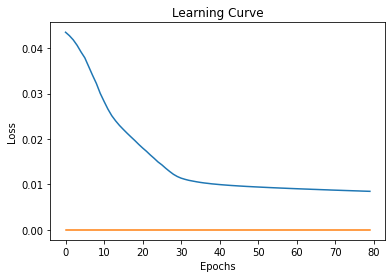

<Figure size 576x576 with 0 Axes>

In [16]:
model_eval.plot_learning_curve(results['train_losses'],
                                          results['valid_losses'])

Confusion matrix with normalization


<module 'matplotlib.pyplot' from '/home/ashome/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

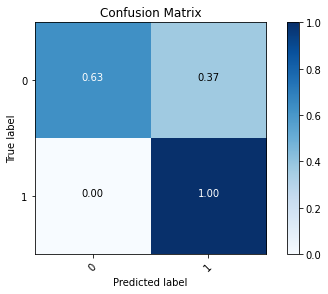

<Figure size 576x576 with 0 Axes>

In [17]:
matrix = confusion_matrix(results['y_true'], results['y_pred'])
model_eval.plot_confusion_matrix(matrix, classes=[0, 1], normalize=True)

In [18]:
print(classification_report(results['y_true'], results['y_pred']))

              precision    recall  f1-score   support

         0.0       1.00      0.63      0.78        98
         1.0       0.05      1.00      0.10         2

    accuracy                           0.64       100
   macro avg       0.53      0.82      0.44       100
weighted avg       0.98      0.64      0.76       100

